# Ratu Noor Hasannah - 162112133112

Instruksi Praktikum:
1. Buat file ipynb baru.
2. Coba perbaiki training dan validation accuracy (boleh modifikasi preprocessing, arsitektur CNN dst).
3. Berikan markdown untuk tiap step pada file ipynb yang akan disubmit.
4. Tunjukkan preview beberapa gambar dan labelnya yang merupakan hasil dari CNN
4. Submit di hebat dengan batas waktu seminggu beserta dengan laporannya.

link data: https://www.kaggle.com/datasets/juliencalenge/felidae-tiger-lion-cheetah-leopard-puma?select=Felidae

referensi:
https://www.kaggle.com/code/brunobrazda/felidae-classification-with-efficientnetb5

In [1]:
!pip install split-folders

In [2]:
pip install --upgrade tensorflow


In [3]:
!pip install optimizers

  Preparing metadata (setup.py) ... done
  Created wheel for optimizers: filename=Optimizers-0.1-py3-none-any.whl size=17007 sha256=1ccb446523b8e4e98d20e477b1f50fb10d6e84001fcdf791cbc5b2e44bfac2ac
  Stored in directory: /root/.cache/pip/wheels/21/85/73/6114e547e45ab65253df3cba8144782286634fa9773a5a7828
Successfully built optimizers


In [2]:
import numpy as np
from ipywidgets import interact, widgets
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,BatchNormalization,Flatten
from keras import optimizers
from keras import Model
from tensorflow.python.keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Dense, Dropout
from keras.models import Model
from keras.optimizers import Adamax
from keras.applications import efficientnet
from keras.layers import BatchNormalization

import splitfolders
import zipfile
import random
import shutil
from shutil import copyfile
from scipy import misc
from shutil import copyfile

import keras as keras
from tensorflow.keras.optimizers import Adam,Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model,load_model,Sequential
from tensorflow.keras.optimizers import RMSprop


Load Data and Preprocessing

In [3]:
from google.colab import drive
import os
from PIL import Image
import numpy as np

In [4]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Felidae')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# @title Split Data
splitfolders.ratio('/content/drive/My Drive/Felidae', output="felidae_split", seed=42, ratio=(.8, .2))


Copying files: 0 files [00:00, ? files/s]
Copying files: 8 files [00:00, 74.76 files/s]
Copying files: 16 files [00:00, 70.24 files/s]
Copying files: 24 files [00:01, 18.93 files/s]
Copying files: 29 files [00:01, 10.92 files/s]
Copying files: 32 files [00:02,  8.36 files/s]
Copying files: 34 files [00:03,  7.14 files/s]
Copying files: 36 files [00:03,  7.03 files/s]
Copying files: 38 files [00:03,  6.95 files/s]
Copying files: 40 files [00:04,  5.34 files/s]
Copying files: 41 files [00:04,  5.45 files/s]
Copying files: 42 files [00:04,  5.59 files/s]
Copying files: 43 files [00:04,  5.16 files/s]
Copying files: 44 files [00:05,  5.19 files/s]
Copying files: 45 files [00:05,  5.20 files/s]
Copying files: 46 files [00:05,  5.66 files/s]
Copying files: 47 files [00:05,  5.08 files/s]
Copying files: 48 files [00:06,  4.60 files/s]
Copying files: 49 files [00:06,  5.03 files/s]
Copying files: 50 files [00:06,  5.26 files/s]
Copying files: 51 files [00:06,  5.55 files/s]
Copying files: 52 

Setelah menjalankan code chunk diatas, muncul folder baru bada folder 'felidae' berisi data yang sudah displit menjadi train dan val data:
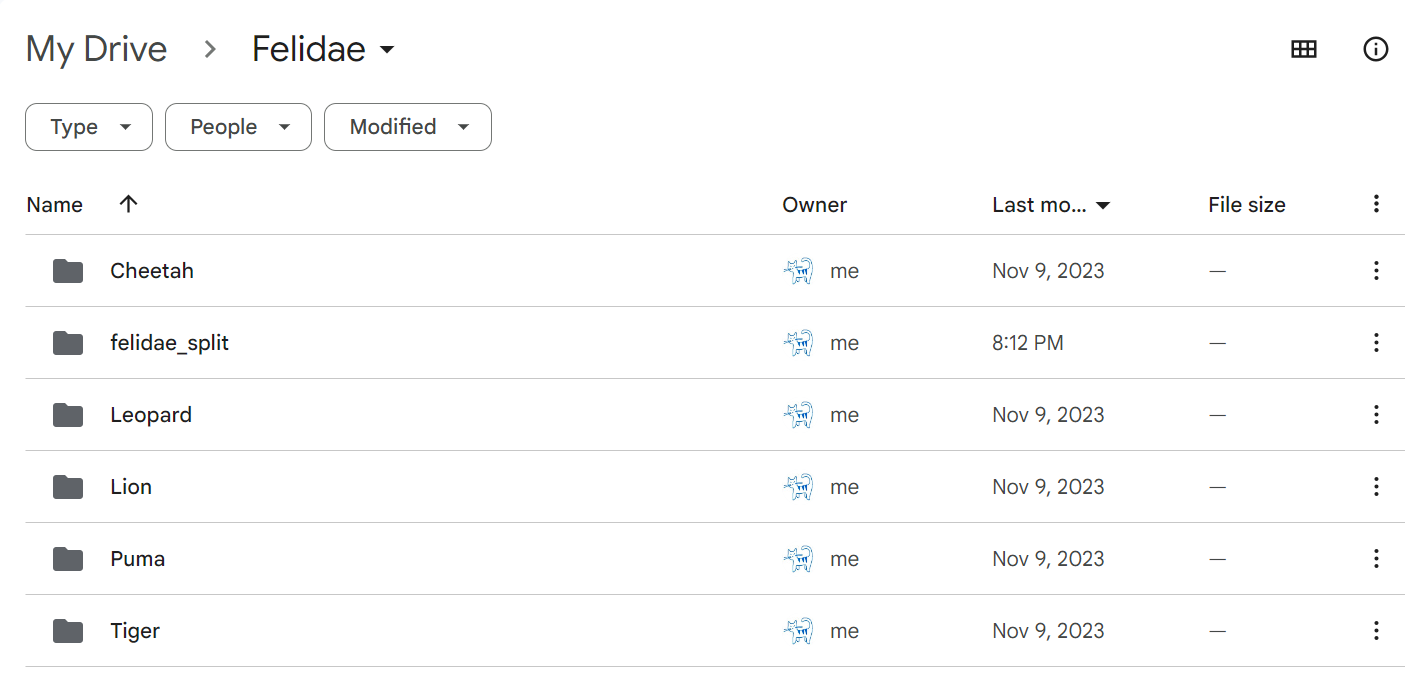

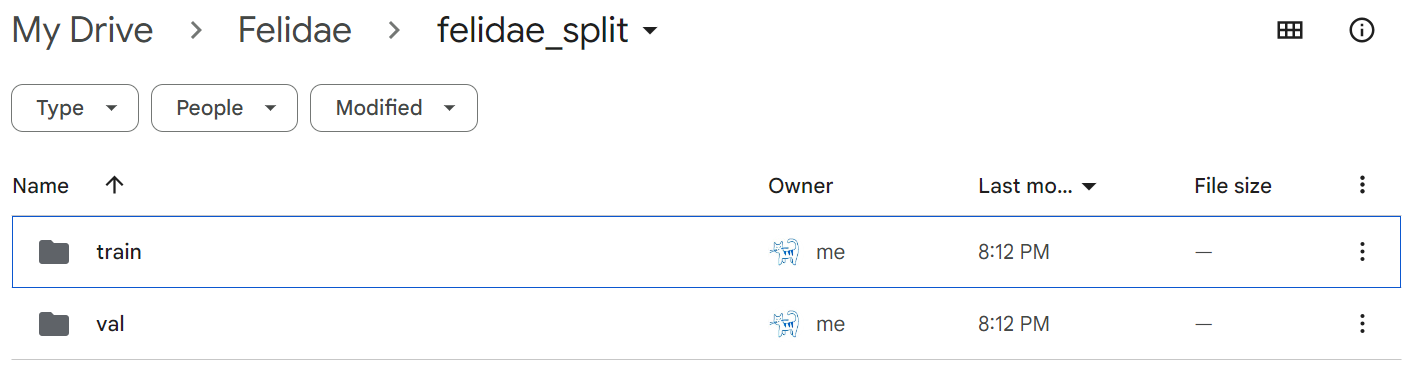

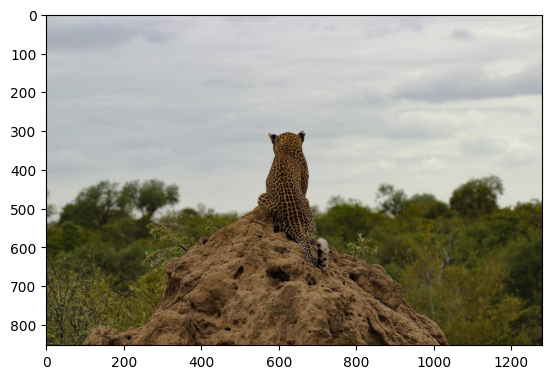

In [7]:
leopard = plt.imread('/content/drive/My Drive/Felidae/Leopard/Leopard_049.jpg')

imgplot = plt.imshow(leopard)

In [8]:
# @title Preprocessing
train_datagen = ImageDataGenerator(
    # rescale=1./255,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.2,
    #fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    directory=r"felidae_split/train/",
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=12,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

validation_datagen = ImageDataGenerator()

validation_generator = validation_datagen.flow_from_directory(
    directory=r"felidae_split/val/",
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=12,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

number_of_classes = len(np.unique(train_generator.classes))


Found 193 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [9]:
# @title Modelling
base_model = tf.keras.applications.efficientnet.EfficientNetB5(include_top = False,
                                                               weights = 'imagenet',
                                                               input_shape = (256,256,3),
                                                               pooling = 'max')
x = base_model.output
x = keras.layers.BatchNormalization(axis = -1,momentum = 0.99,epsilon = 0.001)(x)

x = Dense(512,kernel_regularizer = regularizers.l2(l = 0.019),activity_regularizer = regularizers.l1(0.006),
        bias_regularizer = regularizers.l1(0.006),activation = 'relu')(x)

x = Dropout(rate = .42,seed = 42)(x)

output = Dense(number_of_classes,activation = 'softmax')(x)

model = Model(inputs = base_model.input,outputs = output)
model.compile(Adamax(learning_rate = 0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [8]:
history = model.fit(train_generator, epochs = 15, verbose = 2, validation_data = validation_generator)


Epoch 1/15
17/17 - 417s - loss: 18.1702 - accuracy: 0.5285 - val_loss: 23.6871 - val_accuracy: 0.5400 - 417s/epoch - 25s/step
Epoch 2/15
17/17 - 333s - loss: 16.7367 - accuracy: 0.7876 - val_loss: 19.8018 - val_accuracy: 0.8400 - 333s/epoch - 20s/step
Epoch 3/15
17/17 - 329s - loss: 15.7688 - accuracy: 0.8290 - val_loss: 17.5304 - val_accuracy: 0.9200 - 329s/epoch - 19s/step
Epoch 4/15
17/17 - 342s - loss: 14.9738 - accuracy: 0.9016 - val_loss: 15.8679 - val_accuracy: 0.9400 - 342s/epoch - 20s/step
Epoch 5/15
17/17 - 330s - loss: 14.1882 - accuracy: 0.9326 - val_loss: 14.8321 - val_accuracy: 0.9200 - 330s/epoch - 19s/step
Epoch 6/15
17/17 - 323s - loss: 13.6057 - accuracy: 0.9275 - val_loss: 14.1241 - val_accuracy: 0.8600 - 323s/epoch - 19s/step
Epoch 7/15
17/17 - 328s - loss: 12.9075 - accuracy: 0.9585 - val_loss: 13.5726 - val_accuracy: 0.8200 - 328s/epoch - 19s/step
Epoch 8/15
17/17 - 327s - loss: 12.3666 - accuracy: 0.9171 - val_loss: 12.9626 - val_accuracy: 0.7600 - 327s/epoch - 1

In [10]:
from tensorflow.python.keras.callbacks import EarlyStopping

# Callback untuk menghentikan pelatihan jika tidak ada peningkatan akurasi validasi
early_stopping = EarlyStopping(monitor = 'val_loss',
                               patience = 5,
                               restore_best_weights = True)

best_val_accuracy = 0  # Inisialisasi variabel untuk menyimpan akurasi validasi terbaik
best_model = None  # Inisialisasi variabel untuk menyimpan model terbaik

# Model training dengan menggunakan callback
history = model.fit(train_generator,
                    epochs = 15,
                    verbose = 2,
                    validation_data = validation_generator,
                    callbacks=[early_stopping])

Epoch 1/15
17/17 - 413s - loss: 18.3423 - accuracy: 0.4560 - val_loss: 22.1061 - val_accuracy: 0.8000 - 413s/epoch - 24s/step
Epoch 2/15
17/17 - 317s - loss: 16.8815 - accuracy: 0.7513 - val_loss: 18.9442 - val_accuracy: 0.9600 - 317s/epoch - 19s/step
Epoch 3/15
17/17 - 318s - loss: 15.9157 - accuracy: 0.8290 - val_loss: 17.9026 - val_accuracy: 0.9200 - 318s/epoch - 19s/step
Epoch 4/15
17/17 - 322s - loss: 15.1759 - accuracy: 0.8446 - val_loss: 16.1093 - val_accuracy: 0.9000 - 322s/epoch - 19s/step
Epoch 5/15
17/17 - 319s - loss: 14.3333 - accuracy: 0.9223 - val_loss: 14.9477 - val_accuracy: 0.9200 - 319s/epoch - 19s/step
Epoch 6/15
17/17 - 323s - loss: 13.7063 - accuracy: 0.9171 - val_loss: 14.0637 - val_accuracy: 0.9400 - 323s/epoch - 19s/step
Epoch 7/15
17/17 - 323s - loss: 13.0176 - accuracy: 0.9585 - val_loss: 13.2825 - val_accuracy: 0.9400 - 323s/epoch - 19s/step
Epoch 8/15
17/17 - 319s - loss: 12.5293 - accuracy: 0.9223 - val_loss: 12.5184 - val_accuracy: 0.9600 - 319s/epoch - 1

In [ ]:
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping

# # Ganti 'your_model_checkpoint_path' dengan path yang Anda inginkan
# model_checkpoint_path = '/content/drive/My Drive/Felidae'

# # Callback untuk menyimpan model setiap kali validation accuracy terbaik tercapai
# checkpoint = ModelCheckpoint(model_checkpoint_path,
#                              monitor='val_accuracy',
#                              save_best_only=True,
#                              mode='max',
#                              verbose=1)

# # Callback untuk menghentikan pelatihan jika validation loss tidak menurun dalam beberapa epoch
# early_stopping = EarlyStopping(monitor='val_loss',
#                                patience=5,
#                                restore_best_weights=True)

# # Model training
# history = model.fit(train_generator,
#                     epochs=15,
#                     verbose=2,
#                     validation_data=validation_generator,
#                     callbacks=[checkpoint, early_stopping])


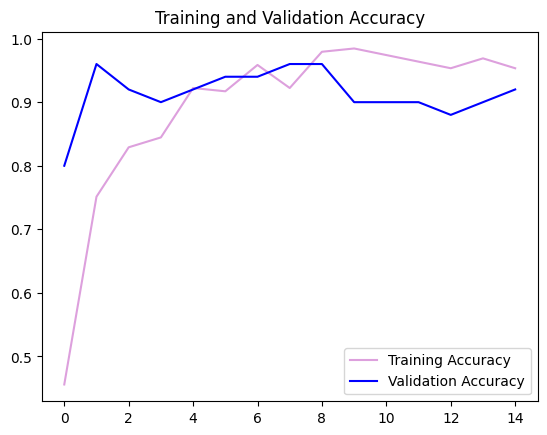

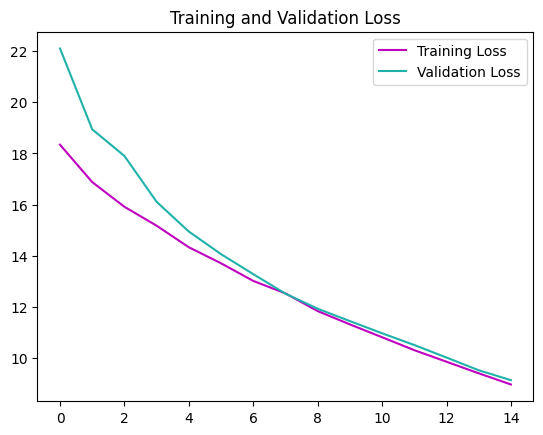

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot Training and Validation Accuracy
plt.plot(epochs, acc, 'plum', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()  # Menambahkan legenda

plt.show()

# Plot Training and Validation Loss
plt.plot(epochs, loss, 'm', label='Training Loss')
plt.plot(epochs, val_loss, 'lightseagreen', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()  # Menambahkan legenda

plt.show()


In [13]:
animal_names = []
for key in train_generator.class_indices.keys():
    animal_names.append(key)
animal_names

['Cheetah', 'Leopard', 'Lion', 'Puma', 'Tiger']

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report
# from tensorflow.python.keras.models import load_model
# from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping

# # Cari epoch dengan akurasi validasi terbaik
# best_epoch = np.argmax(history.history['val_accuracy'])

# # Muat model dari epoch dengan akurasi validasi terbaik
# best_model = load_model(checkpoint_path.format(epoch=best_epoch))

# # Gunakan model dengan akurasi terbaik untuk membuat confusion matrix
# val_predictions = best_model.predict(validation_generator)
# true_classes = validation_generator.classes
# predicted_classes = np.argmax(val_predictions, axis=1)

# conf_matrix = confusion_matrix(true_classes, predicted_classes)

# # Menampilkan confusion matrix menggunakan heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PiYG', xticklabels=animal_names, yticklabels=animal_names)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()


5/5 [==============================] - 18s 3s/step


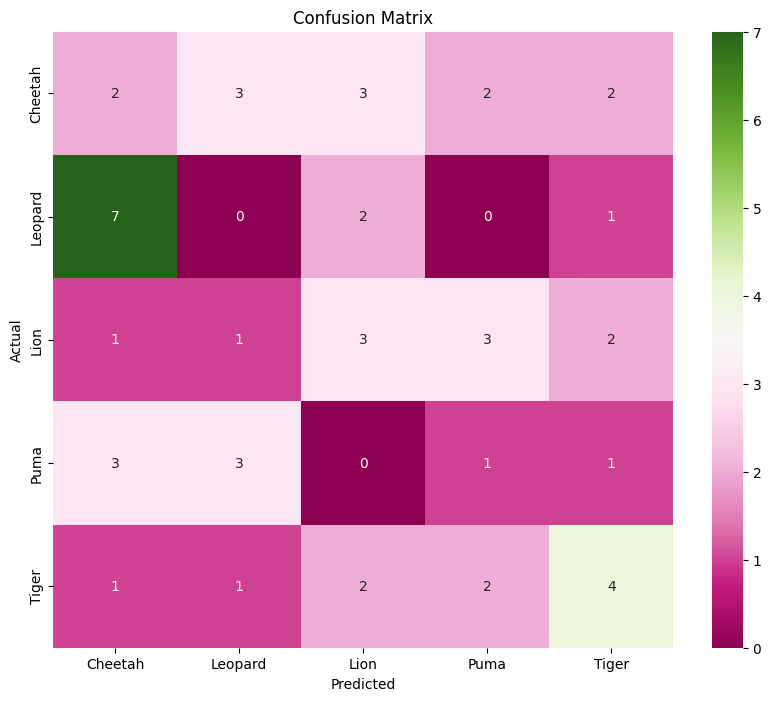

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.python.keras.models import load_model

# # Ganti 'your_model_checkpoint_path' dengan path file checkpoint model
# model_checkpoint_path = '/content/drive/My Drive/Felidae/variables'

# # Muat model dari checkpoint
# loaded_model = load_model(model_checkpoint_path)

# Mendapatkan prediksi untuk data validasi
val_predictions = model.predict(validation_generator)

# Mendapatkan indeks kelas sebenarnya untuk data validasi
true_classes = validation_generator.classes

# Menggunakan argmax untuk mendapatkan indeks kelas prediksi
predicted_classes = np.argmax(val_predictions, axis=1)

# Membuat confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PiYG', xticklabels=animal_names, yticklabels=animal_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [15]:
# @title Membuat fungsi untuk predict
def predict_animal(model, image, animal_names):
    # Load and display the image
    plt.imshow(image)

    # Resize and preprocess the image
    image = tf.image.resize(images=image, size=(256, 256))
    image = tf.expand_dims(image, axis=0)

    # Make prediction using the model
    predictions = model.predict(image)
    predicted_index = np.argmax(predictions[0])

    # Display the prediction result
    probability = round(predictions[0][predicted_index] * 100, 2)
    predicted_animal = animal_names[predicted_index]

    print(f"With a probability of {probability}%, this is a {predicted_animal}.")


1/1 [==============================] - 6s 6s/step
With a probability of 99.98%, this is a Tiger.


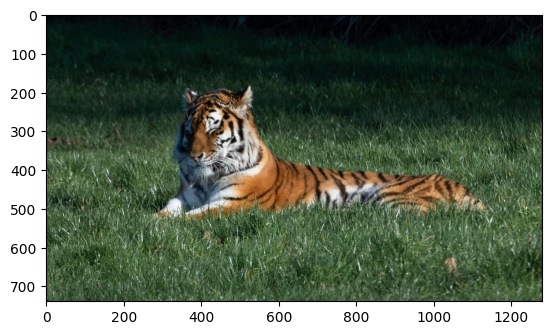

In [16]:
tiger = plt.imread('/content/drive/My Drive/Felidae/felidae_split/val/Tiger/Tiger_018.jpg')
predict_animal(model, tiger, animal_names)

1/1 [==============================] - 1s 788ms/step
With a probability of 99.98%, this is a Lion.


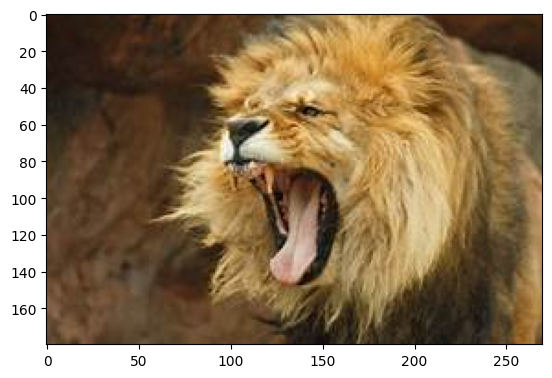

In [17]:
hewan_apa = plt.imread('/content/drive/My Drive/Test/test_1.jpeg')
predict_animal(model, hewan_apa, animal_names)

1/1 [==============================] - 0s 379ms/step
With a probability of 76.79%, this is a Lion.


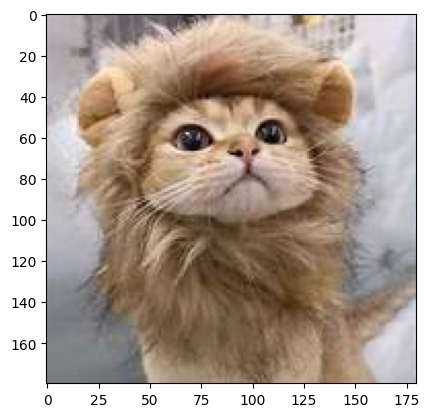

In [18]:
hewan_apa2 = plt.imread('/content/drive/My Drive/Test/test_2.jpeg')
predict_animal(model, hewan_apa2, animal_names)